<a href="https://colab.research.google.com/github/preetamjumech/cifar10_cnn_in_pytorch/blob/main/Preetam_Saha_CIFAR10_29_09_2022_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [3]:
import torch, torchsummary
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, RMSprop
import numpy as np

In [8]:
x_train = torch.tensor(x_train)
x_train.shape

torch.Size([50000, 32, 32, 3])

In [11]:
x_train = x_train.reshape(-1,3,32,32)
x_train.shape

torch.Size([50000, 3, 32, 32])

In [13]:
y_train = torch.tensor(y_train)
x_test = torch.tensor(x_test)
y_test = torch.tensor(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [14]:
x_test.shape , y_train.shape, y_test.shape

(torch.Size([10000, 32, 32, 3]),
 torch.Size([50000, 1]),
 torch.Size([10000, 1]))

In [15]:
x_test = x_test.reshape(-1,3,32,32)
x_test.shape

torch.Size([10000, 3, 32, 32])

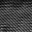

In [17]:
from PIL import Image
idx = 3
Image.fromarray(x_train[idx,0,:,:].numpy())

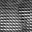

In [18]:
Image.fromarray(x_train[idx,1,:,:].numpy())

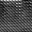

In [19]:
Image.fromarray(x_train[idx,2,:,:].numpy())

In [56]:
y_test = y_test.reshape(-1,)
y_test.shape

torch.Size([10000])

In [54]:
y_train = y_train.reshape(-1,)
y_train.shape

torch.Size([50000])

In [55]:
y_train

tensor([6, 9, 9,  ..., 9, 1, 1], dtype=torch.uint8)

In [25]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [26]:
x_train.shape

torch.Size([50000, 3, 32, 32])

In [57]:
class CIFAR_CNN(nn.Module):
  def __init__(self):
    super(CIFAR_CNN,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=16, kernel_size=3, padding=1 ) #in_channel = channel, out_channels=no of filters, kernel_Size = filter size
    self.conv2 = nn.Conv2d(in_channels=16,out_channels=32, kernel_size=3, padding=1 )
    self.conv3 = nn.Conv2d(in_channels=32,out_channels=64, kernel_size=3, padding=1 )
    self.conv4 = nn.Conv2d(in_channels=64,out_channels=128, kernel_size=3, padding=1 )
    self.bn1 = nn.BatchNorm2d(num_features=16)
    self.bn2 = nn.BatchNorm2d(num_features=32)
    self.bn3 = nn.BatchNorm2d(num_features=64)
    self.pool = nn.MaxPool2d(kernel_size=2, stride = 2) #by pooling only reduction happenes, stride = 2 means jump of 2 pixels
    self.h1 = nn.Linear(in_features=2*2*128, out_features= 512)
    self.h2 = nn.Linear(in_features=512, out_features= 256)
    self.h3 = nn.Linear(in_features= 256, out_features= 32)
    self.out = nn.Linear(in_features = 32, out_features=10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)

    x = self.bn1(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)

    x = self.bn2(x)
    x = F.relu(self.conv3(x))
    x = self.pool(x)

    x = self.bn3(x)
    x = F.relu(self.conv4(x))
    x = self.pool(x)
    #print(x.size())

    x = x.view(x.size()[0],-1)
    #print(x.size())

    x = F.relu(self.h1(x))
    x = F.relu(self.h2(x))
    x = F.relu(self.h3(x))
    x = self.out(x)

    return x

In [58]:
cnn_model = CIFAR_CNN()

In [59]:
list(cnn_model.parameters())

[Parameter containing:
 tensor([[[[-0.0368,  0.0393, -0.0975],
           [ 0.0071, -0.1781,  0.1818],
           [ 0.0591,  0.1788, -0.0823]],
 
          [[-0.1858, -0.1249,  0.0331],
           [ 0.1845, -0.1607, -0.1039],
           [ 0.0993, -0.1633, -0.0403]],
 
          [[-0.1273, -0.1249, -0.0218],
           [-0.1469, -0.1876,  0.1553],
           [-0.1436, -0.1536,  0.1644]]],
 
 
         [[[-0.1607, -0.1220, -0.1002],
           [ 0.0804, -0.0247, -0.0704],
           [ 0.1399, -0.0126,  0.1651]],
 
          [[-0.1902, -0.0367, -0.0691],
           [ 0.0937,  0.1552,  0.0993],
           [-0.1856, -0.1520,  0.0547]],
 
          [[-0.0411,  0.0152, -0.0400],
           [ 0.1108,  0.1732, -0.0804],
           [ 0.1882,  0.0290, -0.1758]]],
 
 
         [[[ 0.0908,  0.1200, -0.0507],
           [ 0.0787,  0.0255, -0.0698],
           [-0.1543, -0.1497,  0.1603]],
 
          [[ 0.1528,  0.1636,  0.1079],
           [ 0.0327,  0.1290,  0.1898],
           [ 0.1432,  0.0982, 

In [60]:
torchsummary.summary(cnn_model,input_size=(3,32,32),device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         MaxPool2d-2           [-1, 16, 16, 16]               0
       BatchNorm2d-3           [-1, 16, 16, 16]              32
            Conv2d-4           [-1, 32, 16, 16]           4,640
         MaxPool2d-5             [-1, 32, 8, 8]               0
       BatchNorm2d-6             [-1, 32, 8, 8]              64
            Conv2d-7             [-1, 64, 8, 8]          18,496
         MaxPool2d-8             [-1, 64, 4, 4]               0
       BatchNorm2d-9             [-1, 64, 4, 4]             128
           Conv2d-10            [-1, 128, 4, 4]          73,856
        MaxPool2d-11            [-1, 128, 2, 2]               0
           Linear-12                  [-1, 512]         262,656
           Linear-13                  [-1, 256]         131,328
           Linear-14                   

In [61]:
opt = Adam(params=cnn_model.parameters())

In [62]:
from torch.utils.data import DataLoader, TensorDataset

In [63]:
train_loader = DataLoader(TensorDataset(x_train.float(),y_train),batch_size=64,shuffle=True)

In [64]:
val_loader = DataLoader(TensorDataset(x_test.float(),y_test),batch_size=128,shuffle=False)

In [65]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [66]:
cnn_model = cnn_model.to(device)

In [67]:
from tqdm import tqdm

In [71]:
def training(model, train_loader, opt):
    train_loss = 0.0
    model.train()
    for batch, target in tqdm(train_loader):
        batch = batch.float().to(device)
        target = target.to(device)
        #print(target.dtype)

        opt.zero_grad()
        output = model(batch.float())
        #print(output.dtype)

        loss = F.cross_entropy(output, target)
        loss.backward()
        opt.step()
        train_loss += loss.item()

    return train_loss

In [72]:
def validate(model, test_loader, opt):
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for batch, target in tqdm(test_loader):
            batch = batch.float().to(device)
            target = target.to(device)

            output = model(batch.float())
            loss = F.cross_entropy(output, target)
            val_loss += loss.item()
    return val_loss

In [73]:
model = cnn_model.to(device)
hist = {'train_loss':[], 'val_loss':[]}
for epoch in range(25):
    hist['train_loss'].append(training(model, train_loader,opt))
    hist['val_loss'].append(validate(model, val_loader,opt))

100%|██████████| 79/79 [00:00<00:00, 364.11it/s]


In [74]:
print(hist)

{'train_loss': [1393.0781267881393, 1211.2381179332733, 1125.515290260315, 1051.416538119316, 984.6025753617287, 926.1889035105705, 862.3060865998268, 801.6490242481232, 740.3767539858818, 683.8255159854889, 631.277863651514, 578.964638710022, 529.2356527149677, 485.2947681546211, 441.6101594865322, 409.7758908569813, 379.4746562540531, 344.75950214266777, 319.8270109295845, 296.06997656822205, 272.42320197075605, 258.23173474520445, 238.36968891322613, 224.43201610818505, 213.06642573699355], 'val_loss': [137.39476466178894, 119.74743986129761, 112.9001624584198, 113.07847654819489, 107.00183165073395, 104.90445590019226, 105.83711636066437, 109.06870901584625, 109.42035973072052, 117.30187392234802, 116.36667513847351, 127.84972786903381, 132.4256513118744, 134.5769271850586, 139.06925570964813, 149.45225036144257, 150.8348467350006, 165.14347505569458, 170.400444149971, 174.76184964179993, 191.4587972164154, 186.9757604598999, 198.0314930677414, 206.63910925388336, 206.0452964305877

In [75]:
final_pred_vals = cnn_model(x_test.float().to(device)).detach().cpu().numpy()

In [76]:
preds = np.argmax(final_pred_vals,axis =1)

In [77]:
from  sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
confusion_matrix(preds,y_test)

array([[537,  47,  70,  30,  31,  20,   6,  20, 134,  55],
       [ 34, 582,  12,  15,   2,   4,   7,  11,  47, 147],
       [ 87,  21, 376, 125, 140, 100,  91,  55,  36,  26],
       [ 34,  35,  87, 291,  65, 211,  79,  49,  17,  26],
       [ 65,  26, 183, 130, 523, 120, 127, 164,  46,  24],
       [ 16,  16,  77, 176,  46, 352,  35,  61,  17,  12],
       [ 22,  24,  91, 115,  76,  71, 602,  24,  15,  28],
       [ 41,  23,  63,  66,  81,  95,  24, 567,  14,  43],
       [116,  43,  15,  24,  24,  16,  14,  11, 614,  53],
       [ 48, 183,  26,  28,  12,  11,  15,  38,  60, 586]])

In [79]:
accuracy_score(preds,y_test)

0.503